
<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Introduction au Deep Learning avec Keras</h1></center>
<center><h2>Les images en Deep Learning</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

## Introduction


> Comme nous l'avons vu précédement, les différents domaines d'application du Deep Learning nécessitent du traitement d'images. Par exemple, pour un système de reconnaissance faciale ou encore un système de detection d'objets.
>
>
> Ce domaine d'application de la Data Science s'appelle la *Computer Vision* (Vision par ordinateur). 
> Cette vidéo résume et illustre le principe de la Computer Vision : 
>[![Cette vidéo illustre le principe de la Computer Vision :](https://img.youtube.com/vi/3jLxVYe-Nwc/0.jpg)](https://www.youtube.com/watch?v=3jLxVYe-Nwc "Qu'est-ce que la Computer Vision? ")
>
>
>Il est important de comprendre la structure d'une image afin de réaliser toutes sortes d'opérations sur cette dernière.
>
>Sur Python, une image est interprétée comme un tableau à trois dimensions (numpy array) reprenant l'ensemble des pixels de l'image : 
>* Une première pour le nombre de pixels en **`hauteur`**.
>
>
>* Une deuxième pour le nombre de pixels en **`largeur`**.
>
>
>* Enfin une troisème qui correspond aux intensités lumineuses. En effet, un pixel d'écran peut simuler une couleur en superposant 3 canaux correspondant aux couleurs rouge, vert et bleu.
En variant l'intensité lumineuse de ces canaux, il est possible de parcourir une grande partie de la gamme des couleurs visibles par l'œil humain.
>
>**En voici une illustration** : 
<img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/rvb_151.png' style="height:250px">

###  Lire, redimensionner et afficher une image 

>L'étape la plus importante avant de commencer est forcément de lire une image qui nous servira lors de notre analyse.
>
>Il est également possible que nous ayons besoin de redimensionner une image pour que l'algorithme fonctionne correctement.
>
>Pour effectuer ces opérations, nous allons utiliser la bibliothèque OpenCV.

### Compétences requises

> * Scikit-learn
> * Matplotlib

- **(a)** Exécuter la cellule ci-dessous pour importer les modules nécessaires à l'exercice.



In [1]:
%matplotlib inline
import numpy as np # Pour la manipulation de tableaux

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.model_selection import train_test_split # Pour répartir les données
from tensorflow.keras.datasets.mnist import load_data # Pour importer le datasets mnist de Keras

import cv2 # Pour importer une image



### Chargement d'une image
>Pour lire une image grâce à la bibliothèque OpenCV, il suffit d'appliquer la fonction **`.imread`** du module **`cv2`**.
>
* **(b)** Lire l'image portant le nom **'voiture.png'** grâce à la fonction **`.imread`**, on nommera cette variable **`voiture`**. L'objet renvoyé sera un array **numpy**.
* **(c)** Afficher les dimensions de l'image grâce à la fonction **`.shape`**



In [2]:
## Insérez votre code ici



In [4]:
voiture = cv2.imread('voiture.png') # Lecture de l'image


voiture.shape # Dimensions de l'image



(1065, 1560, 3)


>On a donc une image de dimension (1065, 1560, 3). Cette image est constituée de 1065 pixels en hauteur, 1560 en largeur sur 3 canaux.
* **(d)** A l'aide de la fonction **`.imshow`** du module **`matplotlib.pyplot`**, affichez l'image en question. Elle prendra en argument l'image **`voiture`**.



In [5]:
## Insérez votre code ici


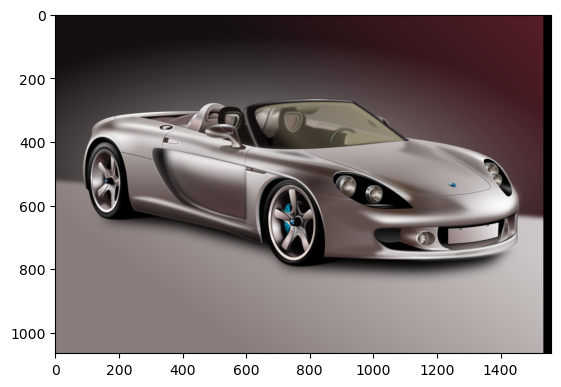

In [6]:
plt.imshow(voiture);



>Il est également possible de redimmensionner une image si elle n'est pas au format souhaité. Pour cela, nous allons utiliser la fonction **`.resize`** du module **`cv2`**.
>
* **(e)** Dans un **`tuple`** nommé **`dsize`**, stocker les dimensions souhaitées pour l'image, par exemple une largeur de 800 pixels et une hauteur de 500 pixels. Ce **`tuple`** doit contenir deux éléments : *width* et *height*.
* **(f)** Appliquer la fonction **`.resize`** à l'image **`voiture`** et stocker le résultat dans un array nommé **`resized`**.



In [7]:
## Insérez votre code ici


In [8]:
# dsize
dsize = (800,500)

# redimensionnement de  l'image
resized = cv2.resize(voiture, dsize)



>Comme evoqué précédemment, une image est vue et est interprétée par python comme un array **`numpy`** regoupant l'ensemble des pixels ainsi que leur intensité lumineuses.
>Pour apporter les modifications du redimensionnement de l'image à notre tableau, nous allons utiliser la fonction **`.imwrite`** du module cv2 sur notre **`resized`**.
> 
* **(g)** Enregistrer le changement de dimensions




In [9]:
## Insérez votre code ici


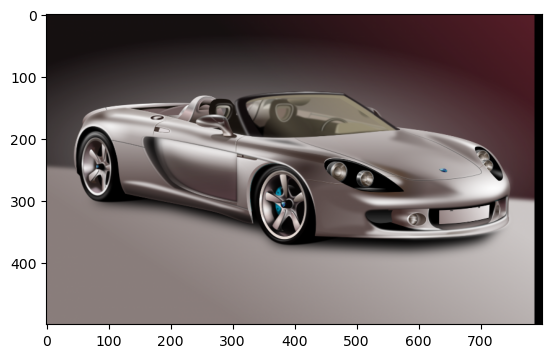

In [10]:
cv2.imwrite('voiture.jpg',resized) 
plt.imshow(resized);



## Application

> La base MNIST (*Modified National Institute of Standards and Technology*) est une base de données de chiffres écrits à la main développée pour le problème de reconnaissance de chiffres manuscrits par trois chercheurs très réputés dans ce domaine: Yann LeCun, Corinna Cortes et Christopher Burges.
>
> Elle regroupe 70 000 images, issues d'une base de données antérieure, appelée NIST. 
> Ces images sont en échelle de gris, normalisées centrées et de taille 28x28 pixels.
> Les images sont données ici sous forme de vecteurs unidimensionnels de taille 784 (= 28 x 28 x 1). Nous sommes ici sur un seul canal représentant les échelles de gris.
>
>Plus de détails sur les données MNIST dans le lien suivant: [MNIST](http://yann.lecun.com/exdb/mnist/index.html).<br>
>Plus de détails sur le problème de reconnaissance de chiffres écrits à la main [ici](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf).
><img src="https://datascientest.fr/train/assets/lenet5.gif" style="height:250px">

> Le sous module **`datasets`** de **keras** comprend un ensemble de jeux de données pour le Deep Learning ([plus d'informations](https://keras.io/datasets/)). Pour charger un jeu de données de ses sous-modules, nous pouvons utiliser la fonction suivante :
>
```py
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```
> Dans l'exemple ci-dessus, on importe le jeux de données **`cifar10`** du sous module **`datasets`** de **keras**. Pour charger les données, nous utilisons la fonction **`.load_data()`**.

* **(a)** Utiliser la même syntaxe pour importer le jeux de données **`mnist`** du sous module **`datasets`** de **keras** . Appeler l'échantillon d'entraînement **X_train** et **y_train**, et l'échantillon de validation **X_test** et **y_test**.

* **(b)** Afficher les dimensions de **X_train** et **y_train**



In [11]:
### Insérez votre code ici



In [12]:
# Pour importer le datasets mnist de Keras
from tensorflow.keras.datasets import mnist

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)



Shape of X: (60000, 28, 28)
Shape of y: (60000,)



> Pour afficher des graphiques sur une grille de figures, on utilise la fonction [**`subplot`**](http://matplotlib.org/api/pyplot_api.html?highlight=subplot#matplotlib.pyplot.subplot) de *matplotlib.pyplot*.
>
> Les images originales sont en niveau de gris. Lors de leur affichage, il faut préciser à la fonction [**`imshow`**](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) que l'on souhaite visualiser les pixels en nuance de gris, en choisissant la carte de couleur (**cmap**) correspondante .

* **(c)** Afficher, dans une grille de figures, 6 images tirées aléatoirement de l'échantillon **X_train**, avec en titre les labels correspondants de **y_train**. Pour chaque image il faudra :
    * Sélectionner son emplacement dans la grille de figures.
    * Afficher l'image en niveaux de gris en précisant la *colormap* **'gray'**.
    * Afficher le label correspondant à l'image dans le titre.
    
<div class='alert alert-success'>
<i class='fa fa-exclamation-circle'></i> &emsp;
Les labels des images sont contenus dans le vecteur y_train.
</div>

<div class='alert alert-warning'>
<i class='fa fa-exclamation-circle'></i> &emsp;
Ici, il est nécessaire de préciser le paramètre 'cmap = 'gray' dans la fonction imshow afin d'afficher l'image en niveaux de gris sur fond blanc.
</div>



In [13]:
### Insérez votre code ici




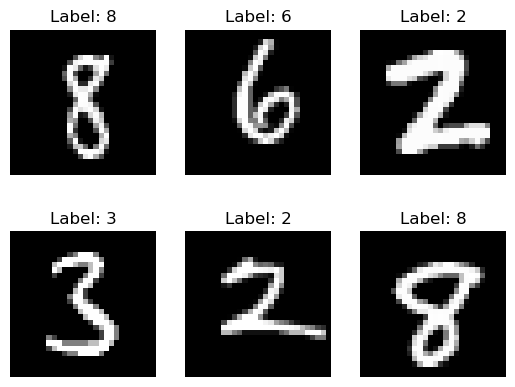

In [14]:
j = 1

for i in np.random.choice(np.arange(0, len(y_train)), size = 6):
    # Image
    img = X_train[i] 
    
    # Subplot nous permet de sélectionner une des sous-figures parmi une grille. Dans notre cas la grille
    # a 2 lignes et 3 colonnes.
    plt.subplot(2, 3, j)
    j = j + 1
    
    # Suppresion des axes
    plt.axis('off')
    
    # Affichage de la figure en niveaux de gris
    plt.imshow(img, cmap='gray', interpolation='None')

    # Modification du titre de la figure
    plt.title('Label: ' + str(y_train[i]))



> Pour se donner une idée plus précise de la forme des différents chiffres écrits, il est possible de procéder à quelques statistiques basées sur les pixels des images.

* **(e)** Pour chaque chiffre de 0 à 9, afficher **l'image moyenne** de l'échantillon X_train. Pour cela, pour chaque chiffre allant de 0 à 9, utiliser la méthode `mean` d'un *array* `numpy` pour calculer la moyenne de chaque pixel, en précisant '`axis = 0`' en paramètre de la méthode `mean` pour que la moyenne se fasse entre toutes les images pour chaque pixels.

<div class="alert alert-success">
<i class="fa fa-info-circle"></i> &emsp; 
Faire une boucle allant de 0 à 9 permettant de calculer l'image moyenne pour chaque chiffre séparément. À l'intérieur de la boucle, sélectionner les images qui correspondent au bon label et calculez ensuite la moyenne. Enfin, afficher les images comme précédemment. 
</div>



In [15]:
### Insérez votre code ici




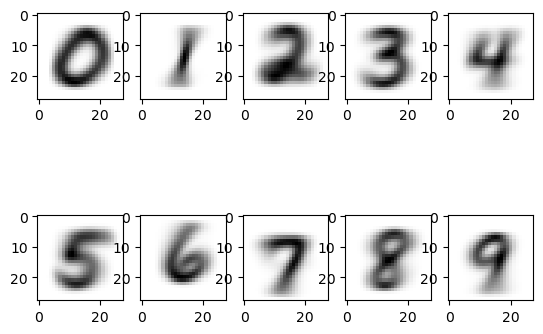

In [16]:
for i in range(10):
    # Sélection des lignes de X_train correspondant au label i
    t = X_train[y_train == i]

    # Calcul de l'image moyenne
    img = t.mean(axis=0)
        
    # Affichage de l'image dans le i+1-ème emplacement d'une grille de figures
    # à 2 lignes et 5 colonnes.    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap=cm.binary, interpolation='None')



* **(f)** Pour se donner une idée de la façon dont chaque chiffre varie dans son échantillon respectif, afficher pour chaque label entre 0 et 9 son **écart type** dans l'échantillon X_train , grâce à la méthode **`std`** d'un *array* `numpy`.

<div class="alert alert-success">
<i class="fa fa-info-circle"></i> &emsp; 
Il suffit de reprendre les mêmes étapes qu'à la question précédente, en remplaçant la méthode *mean* par la méthode *std*.
</div>



In [17]:
### Insérez votre code ici




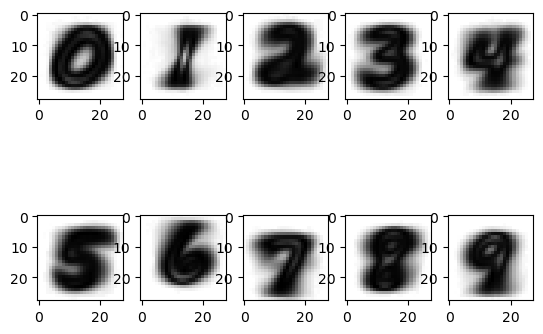

In [18]:
for i in range(10):
    # Selection des lignes de X_train correspondant au label i
    t = X_train[y_train == i]

    # Calcul de l'image moyenne
    img = t.std(axis=0)
    
    # Affichage de l'image dans le i+1-ème emplacement d'une grille de figures
    # à 2 lignes et 5 colonnes.    
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap=cm.binary, interpolation='None') 



<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > Ce qu'il faut retenir </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

> * Les images sont représentées par des matrices de dimensions **(height, width, channels)**. 
> * La bibliothèque **`OpenCV`** dispose de tous les outils pour traiter les images.
> * Il y a des bases de données en accès libre dans **tensorflow.keras.datasets**.

